In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
X1 = np.random.multivariate_normal ([3 , 2] , [[1 , 2] , [2 , 1]] , size = 200)
X2 = np.random.multivariate_normal ([7 , 9] , [[1 , 3] , [3 , 1]] , size = 200)
print(X1.shape)
print(X2.shape)

(200, 2)
(200, 2)


C:\Users\prach\AppData\Local\Temp/ipykernel_8960/3188486816.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal ([3 , 2] , [[1 , 2] , [2 , 1]] , size = 200)
C:\Users\prach\AppData\Local\Temp/ipykernel_8960/3188486816.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal ([7 , 9] , [[1 , 3] , [3 , 1]] , size = 200)


In [8]:
y1 = np.ones((200 ,))
y2 = np.zeros((200,))
print(y1.shape)
print(y2.shape)

(200,)
(200,)


In [9]:
x = np.concatenate([X1 , X2] , axis = 0)
y = np.concatenate([y1 , y2] , axis = 0)

print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [10]:
# data should be shuffled
ix = np.arange(0 , len(x))
print(ix)
np.random.shuffle(ix)
print(ix)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [11]:
x = x[ix]
y = y[ix]

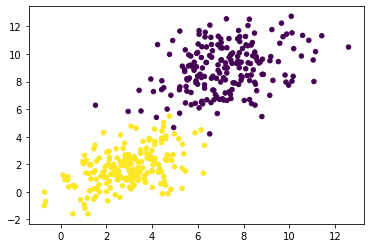

In [12]:
plt.scatter(x[:,0] , x[:,1] , c = y , s = 20)

In [13]:
class LogisticRegression :
    
    def predict (self , X) :
        if self.w.shape[0] != X.shape[1] :
            X = X.copy()
            ones_column = np.ones((len(X) , 1))
            X = np.concatenate([ones_column , X] , axis = 1)
        return self.sigmoid(X.dot(self.w)) 
    
    def sigmoid (self , z) :
        return 1 / (1 + np.e ** (-z))
    
    def sumOfResidual (self , y , y_hat):
        return (y - y_hat).sum()
    
    def __get_gradient(self , X , y, y_hat) :
        grad = []
        for j in range(X.shape[1]) :
            g = -2 * ((y - y_hat).reshape(-1,) * X[:,j]).sum() 
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    
    def __gradient_descent(self , X , y , epochs , learning_rate , batch_size) :
        idx = np.arange(0 , len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X) // batch_size
        
        lossList = []
        for i in range(epochs) :
            for j in range(itr) :
                X_batch , y_batch = X[j * batch_size :(j+1) * batch_size] , y[j * batch_size : (j + 1) * batch_size]
                y_hat_batch = self.predict(X_batch)
                grad = self.__get_gradient(X_batch , y_batch, y_hat_batch)
                self.w = self.w - learning_rate * grad
             
            yhat = self.predict(X)
            loss = self.loss(y , yhat)
            lossList.append(loss)
            acc = self.accuracy(y , yhat)
            sor = self.sumOfResidual(y , yhat)
            print(f"{i + 1}/{epochs}  Loss : {loss} accuracy : {acc}  sor : {sor} ")
            
        return lossList
    
    def loss(self ,ytrue , ypred) :
        return -(ytrue * np.log(ypred + 1e-7) + (1 - ytrue) * np.log(1 - ypred + 1e-7)).sum()
    
    def accuracy (self , ytrue , ypred) :
        return (ytrue == (ypred > 0.5).astype('int')).mean()
    
    def fit(self , X , y, epochs = 1000 , learning_rate = 0.01 , method = 'batch', **kwargs) :
        print(type(epochs))
        X = X.copy()
        ones_column = np.ones((len(X) , 1))
        X = np.concatenate([ones_column , X], axis = 1)
        print(X.shape)
        
        self.w = np.random.rand(X.shape[1] , 1) 
        
        if method == 'batch' :
            batch_size = X.shape[0]
        elif method == 'mini-batch' :
            if kwargs.get('batch_size') == None :
                batch_size = int(X.shape[0] * 0.25)
            else :
                batch_size = kwargs['batch_size']
        elif method == 'stochastic' :
            batch_size = 1
            
        return self.__gradient_descent(X , y ,epochs, learning_rate , batch_size)    

In [14]:
logr = LogisticRegression()
losses = logr.fit(x , y.reshape(-1 , 1) , epochs = 300 , learning_rate = 0.01 , method = 'batch')

<class 'int'>
(400, 3)
1/300  Loss : 3102.778477727163 accuracy : 0.5175  sor : 193.46480724830798 
2/300  Loss : 3071.057656447857 accuracy : 0.52  sor : 192.07189781719256 
3/300  Loss : 2869.5333067500087 accuracy : 0.5325  sor : 186.8194891739793 
4/300  Loss : 645.3115849389314 accuracy : 0.815  sor : 71.69665058098872 
5/300  Loss : 1698.3145886311163 accuracy : 0.65  sor : -127.8381863612006 
6/300  Loss : 2966.381597304302 accuracy : 0.53  sor : 188.03332803378265 
7/300  Loss : 2289.4753501605956 accuracy : 0.605  sor : 159.34831988670197 
8/300  Loss : 393.5441382166249 accuracy : 0.9  sor : 25.680211952812513 
9/300  Loss : 392.1225065160424 accuracy : 0.8925  sor : 9.846908535783946 
10/300  Loss : 407.72899456935113 accuracy : 0.8925  sor : 38.19625816355998 
11/300  Loss : 525.1515015779527 accuracy : 0.855  sor : -26.70664725513151 
12/300  Loss : 1244.6298194404417 accuracy : 0.7375  sor : 104.98595738033842 
13/300  Loss : 714.0170720121846 accuracy : 0.8225  sor : -52

C:\Users\prach\AppData\Local\Temp/ipykernel_8960/1231995383.py:11: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.e ** (-z))


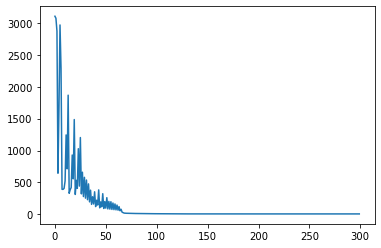

In [15]:
plt.plot(losses)
plt.show()

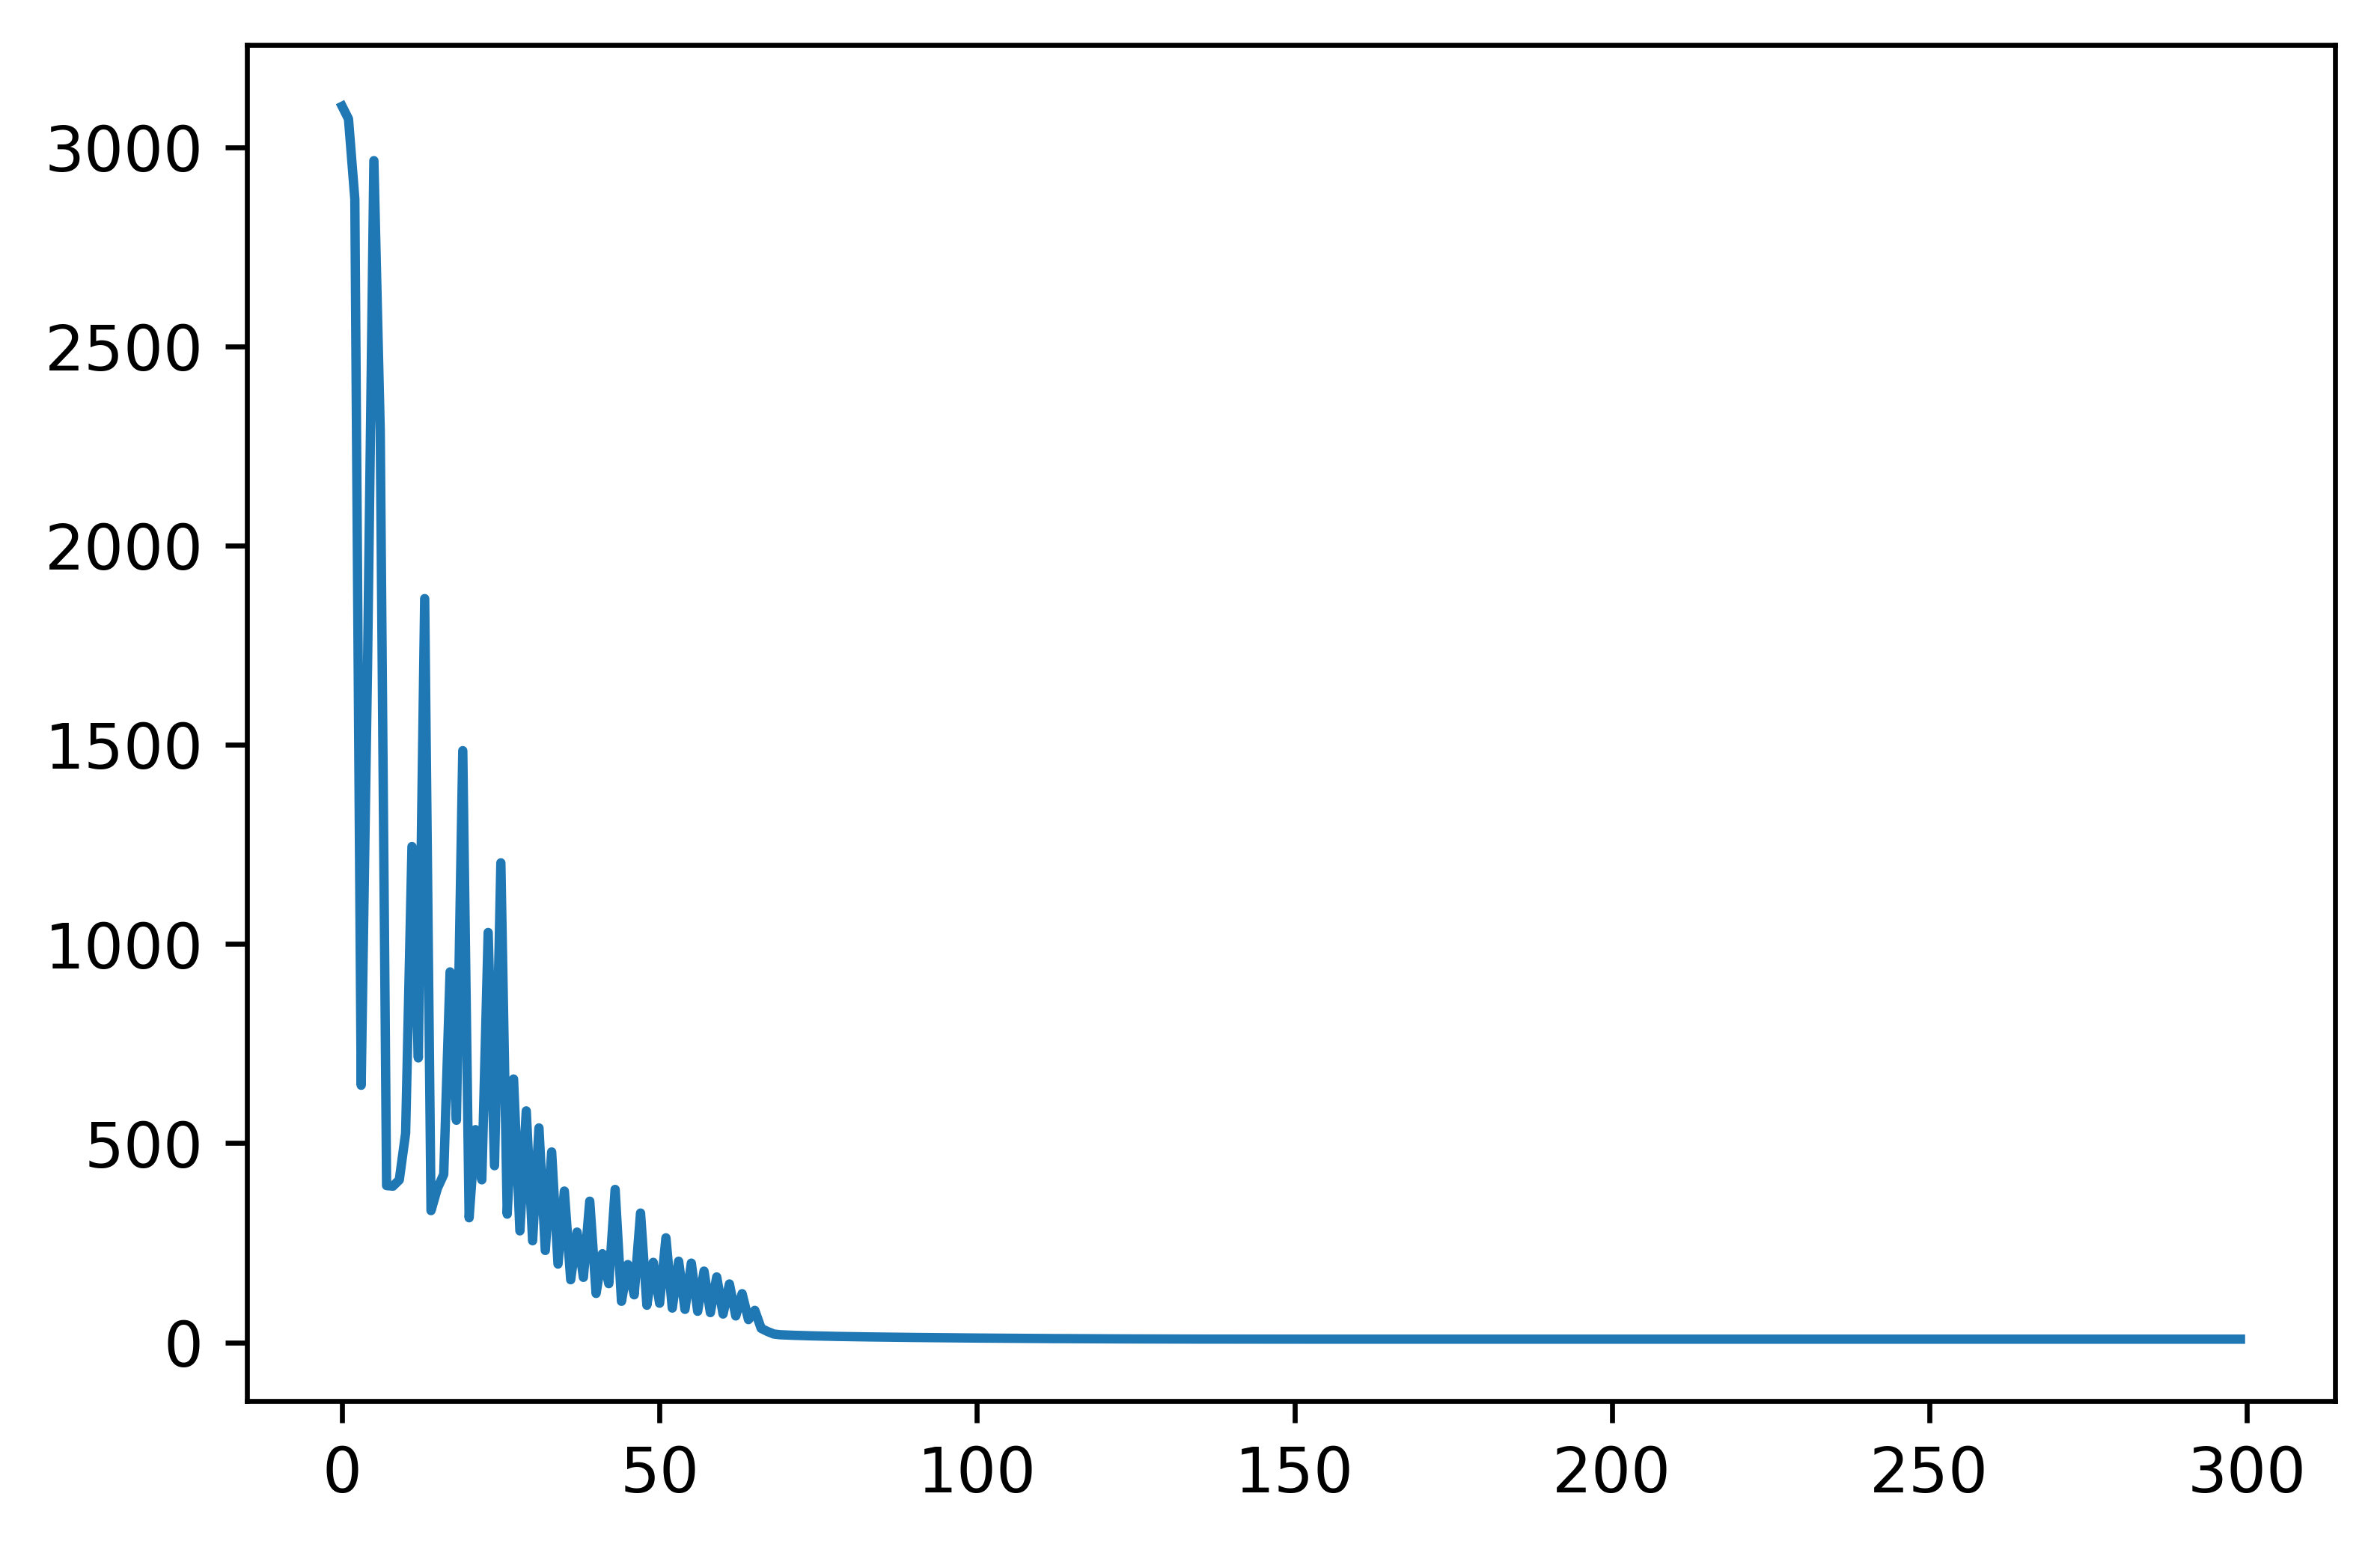

In [16]:
plt.figure(dpi = 600)
plt.plot(losses)
plt.show()

In [17]:
logr.w

array([[32.42311752],
       [-1.56661397],
       [-5.00467626]])

In [18]:
ypred = logr.predict(x)
print(ypred)

[[1.95542961e-16]
 [1.92246877e-07]
 [2.46465754e-10]
 [1.78447160e-10]
 [1.00000000e+00]
 [9.99994705e-01]
 [1.00000000e+00]
 [1.79706024e-19]
 [9.99999728e-01]
 [1.47358645e-11]
 [1.00000000e+00]
 [4.34821318e-07]
 [9.72416185e-01]
 [1.00000000e+00]
 [9.84510543e-01]
 [2.11264578e-10]
 [2.36841641e-01]
 [5.48476823e-07]
 [1.61382865e-11]
 [1.21418260e-16]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.33895499e-20]
 [9.99999999e-01]
 [6.56516412e-18]
 [2.66494642e-14]
 [4.83093451e-09]
 [2.51578568e-16]
 [2.17783354e-10]
 [1.00000000e+00]
 [1.86630577e-14]
 [5.58347143e-01]
 [7.88938544e-02]
 [9.99999921e-01]
 [9.99999989e-01]
 [9.97165000e-01]
 [9.99999527e-01]
 [9.99997435e-01]
 [2.02302699e-08]
 [9.76740316e-01]
 [1.00000000e+00]
 [9.99999998e-01]
 [1.00000000e+00]
 [2.29919173e-12]
 [3.18854530e-14]
 [9.99999739e-01]
 [3.08570286e-15]
 [1.00000000e+00]
 [2.79818442e-06]
 [1.67365990e-18]
 [3.23683465e-05]
 [3.54654071e-09]
 [1.00000000e+00]
 [9.99999999e-01]
 [1.00000000e+00]
 [1.000000

In [19]:
logr.accuracy(y.reshape(-1,1) , ypred)

0.9925